In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Extract the responses
with open("../Completions/Ratings/rating-vs-response.txt", "r", encoding="utf-8") as f:
    raw = f.read()
raw_responses = re.findall(r"^Response:\s*(.*)", raw, flags=re.MULTILINE)
raw_ratings = re.findall(r"^Rating:\s*(.*)", raw, flags=re.MULTILINE)

In [4]:
# Cast to floats
ratings = [float(idx) for idx in raw_ratings]
responses = [float(idx) for idx in raw_responses]

# Change the scale to 1->10
ratings = [((idx * 5) + 5) for idx in ratings]
responses = [((idx * 5) + 5) for idx in responses]

# Grouping the ratings to a single output
response_group = []
rating_group = []
for i in range(0, len(responses)-1, 2):
    response_group.append((responses[i], responses[i+1]))
for i in range(0, len(ratings)-1, 2):
    rating_group.append((ratings[i], ratings[i+1]))

print(f'Rating Mean: {np.mean(ratings)}')
print(f'Rating Std: {np.std(ratings)}')
print(f'Rating Var: {np.var(ratings)}')
print(f'Responses Mean: {np.mean(responses)}')
print(f'Responses Std: {np.std(responses)}')
print(f'Responses Var: {np.var(responses)}')
print()

Rating Mean: 6.229768626910894
Rating Std: 1.0807957602882197
Rating Var: 1.1681194754569908
Responses Mean: 7.513288245641916
Responses Std: 1.316973785255276
Responses Var: 1.7344199510496099



In [6]:
# Finding repeated pairings for the ratings
same_rating_count = 0
different_rating_groups = []
for i, rating_couple in enumerate(rating_group):
    if rating_couple[0] == rating_couple[1]:
        same_rating_count += 1
    else:
        different_rating_groups.append((i, rating_couple))
print(f'Percentage the same rating: {(float(same_rating_count) / float(len(rating_group))) * 100}%')

Percentage the same rating: 54.5227930037185%


In [7]:
# Seeing how often the ratings agree
agreement_count = 0
for rating_couple in different_rating_groups:
    response_at_idx = response_group[rating_couple[0]]
    rating_at_idx = rating_couple[1]

    first_response_higher = True if response_at_idx[0] >= response_at_idx[1] else False
    first_rating_higher = True if rating_at_idx[0] >= rating_at_idx[1] else False

    if first_rating_higher == first_response_higher:
        agreement_count += 1
print(f'Agreement percentage: {(float(agreement_count) / float(len(different_rating_groups))) * 100}%')

Agreement percentage: 54.18975803276703%


In [13]:
# Seeing the distribution in rating pairs
response_pair_delta = []
rating_pair_delta = []
for i in range(len(rating_group)):
    response_at_idx = response_group[i]
    rating_at_idx = rating_group[i]

    # Deltas
    response_pair_delta.append(abs(response_at_idx[0] - response_at_idx[1]))
    rating_pair_delta.append(abs(rating_at_idx[0] - rating_at_idx[1]))

# Find averages
print(f'Average response delta: {np.average(response_pair_delta)}')
print(f'Average rating delta: {np.average(rating_pair_delta)}')
print()

Average response delta: 1.2950643024579136
Average rating delta: 0.7324473213056053



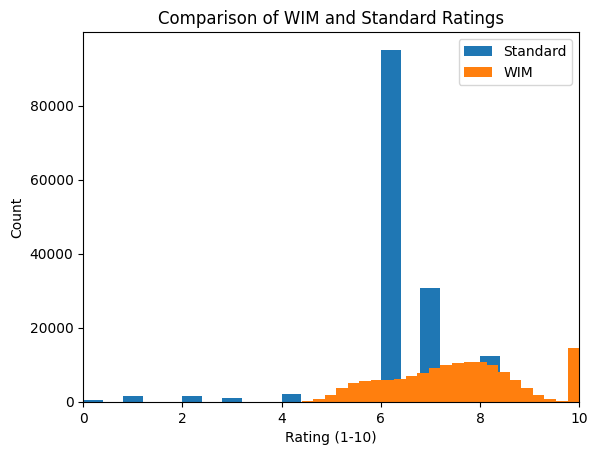

In [6]:
xmin = 0
xmax = 10

plt.figure(1)
plt.ylabel('Count')
plt.xlabel('Rating (1-10)')
plt.xlim(xmin, xmax)
plt.hist(ratings, label='Standard', bins=25)
plt.hist(responses, label='WIM', bins=25)
plt.legend()
plt.title('Comparison of WIM and Standard Ratings')
plt.show()

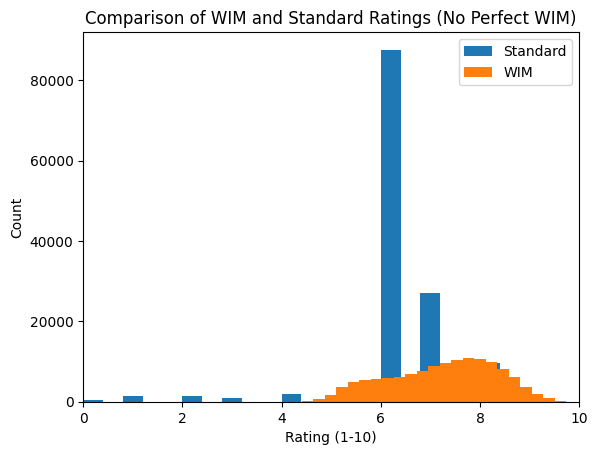

In [13]:
# Only getting the ratings that aren't duplicates
responses_with_wim = []
ratings_with_wim = []

for i, response in enumerate(responses):
    if response != 10:
        responses_with_wim.append(response)
        ratings_with_wim.append(ratings[i])

plt.figure(2)
plt.ylabel('Count')
plt.xlabel('Rating (1-10)')
plt.xlim(xmin, xmax)
plt.hist(ratings_with_wim, label='Standard', bins=25)
plt.hist(responses_with_wim, label='WIM', bins=25)
plt.legend()
plt.title('Comparison of WIM and Standard Ratings (No Perfect WIM)')
plt.show()

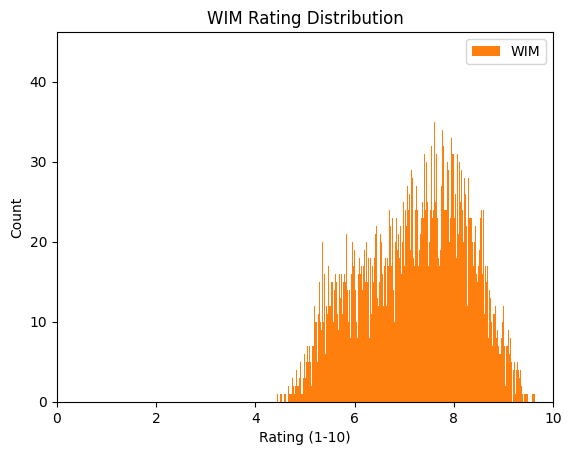

In [26]:
plt.figure(3)
plt.ylabel('Count')
plt.xlabel('Rating (1-10)')
plt.xlim(xmin, xmax)
plt.hist(responses_with_wim, label='WIM', bins=10000, color='#ff7f0e')
plt.legend()
plt.title('WIM Rating Distribution')
plt.show()

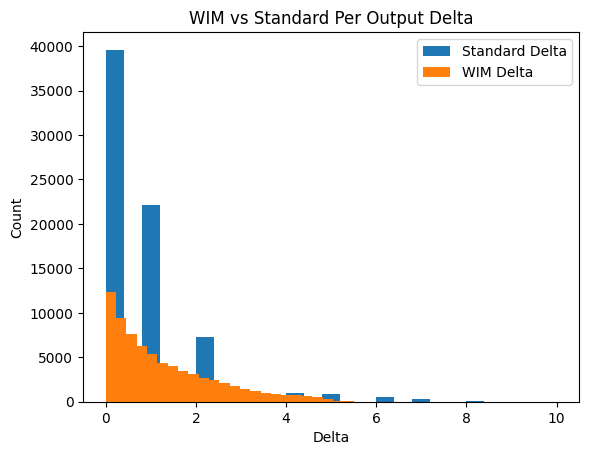

In [ ]:
plt.figure(4)
plt.ylabel('Count')
plt.xlabel('Delta')
plt.hist(rating_pair_delta, label='Standard Delta', bins=25)
plt.hist(response_pair_delta, label='WIM Delta', bins=25)
plt.legend()
plt.title('WIM vs Standard Per Output Delta')
plt.show()

In [23]:
# Getting pairs that aren't 10
response_delta_with_wim = []
rating_delta_with_wim = []

for i, response_pair in enumerate(response_group):
    if (response_pair[0] != 10) or (response_pair[1] != 10):
        response_delta_with_wim.append(abs(response_pair[0] - response_pair[1]))

        # Getting the rating equivalent
        rating_pair = rating_group[i]
        rating_delta_with_wim.append(abs(rating_pair[0] - rating_pair[1]))

# Find averages
print(f'Average response delta: {np.average(response_delta_with_wim)}')
print(f'Average rating delta: {np.average(rating_delta_with_wim)}')
print()

Average response delta: 1.3153718614258012
Average rating delta: 0.732993887171453



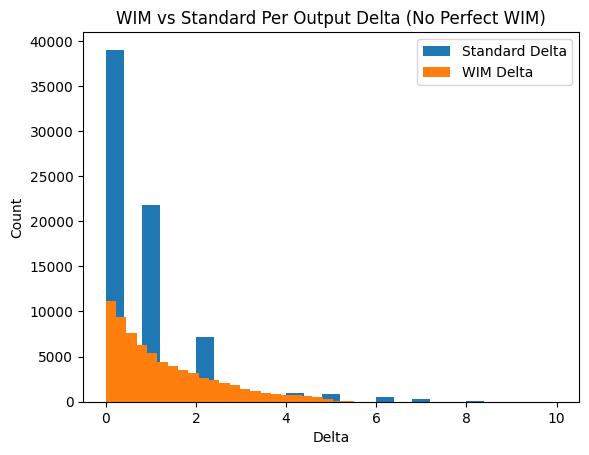

In [24]:
plt.figure(5)
plt.ylabel('Count')
plt.xlabel('Delta')
plt.hist(rating_delta_with_wim, label='Standard Delta', bins=25)
plt.hist(response_delta_with_wim, label='WIM Delta', bins=25)
plt.legend()
plt.title('WIM vs Standard Per Output Delta (No Perfect WIM)')
plt.show()